In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 显示所有列
pd.set_option("display.max_columns",  None)
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import seaborn as sns
%matplotlib inline

Class为label标签列，0表示正常客户，1表示欺诈客户。
V1-V28是经过降维压缩(PCA)等转换手段得到的28个特征

In [2]:
path = "./input/"
data = pd.read_csv(path + "creditcard.csv")
print(data.head())
print(data.info())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20 

In [3]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
# 查看数据缺失情况
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
data.dropna(axis=0, how="any", inplace=True) # inplace=True 在原数据基础上更改

In [6]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


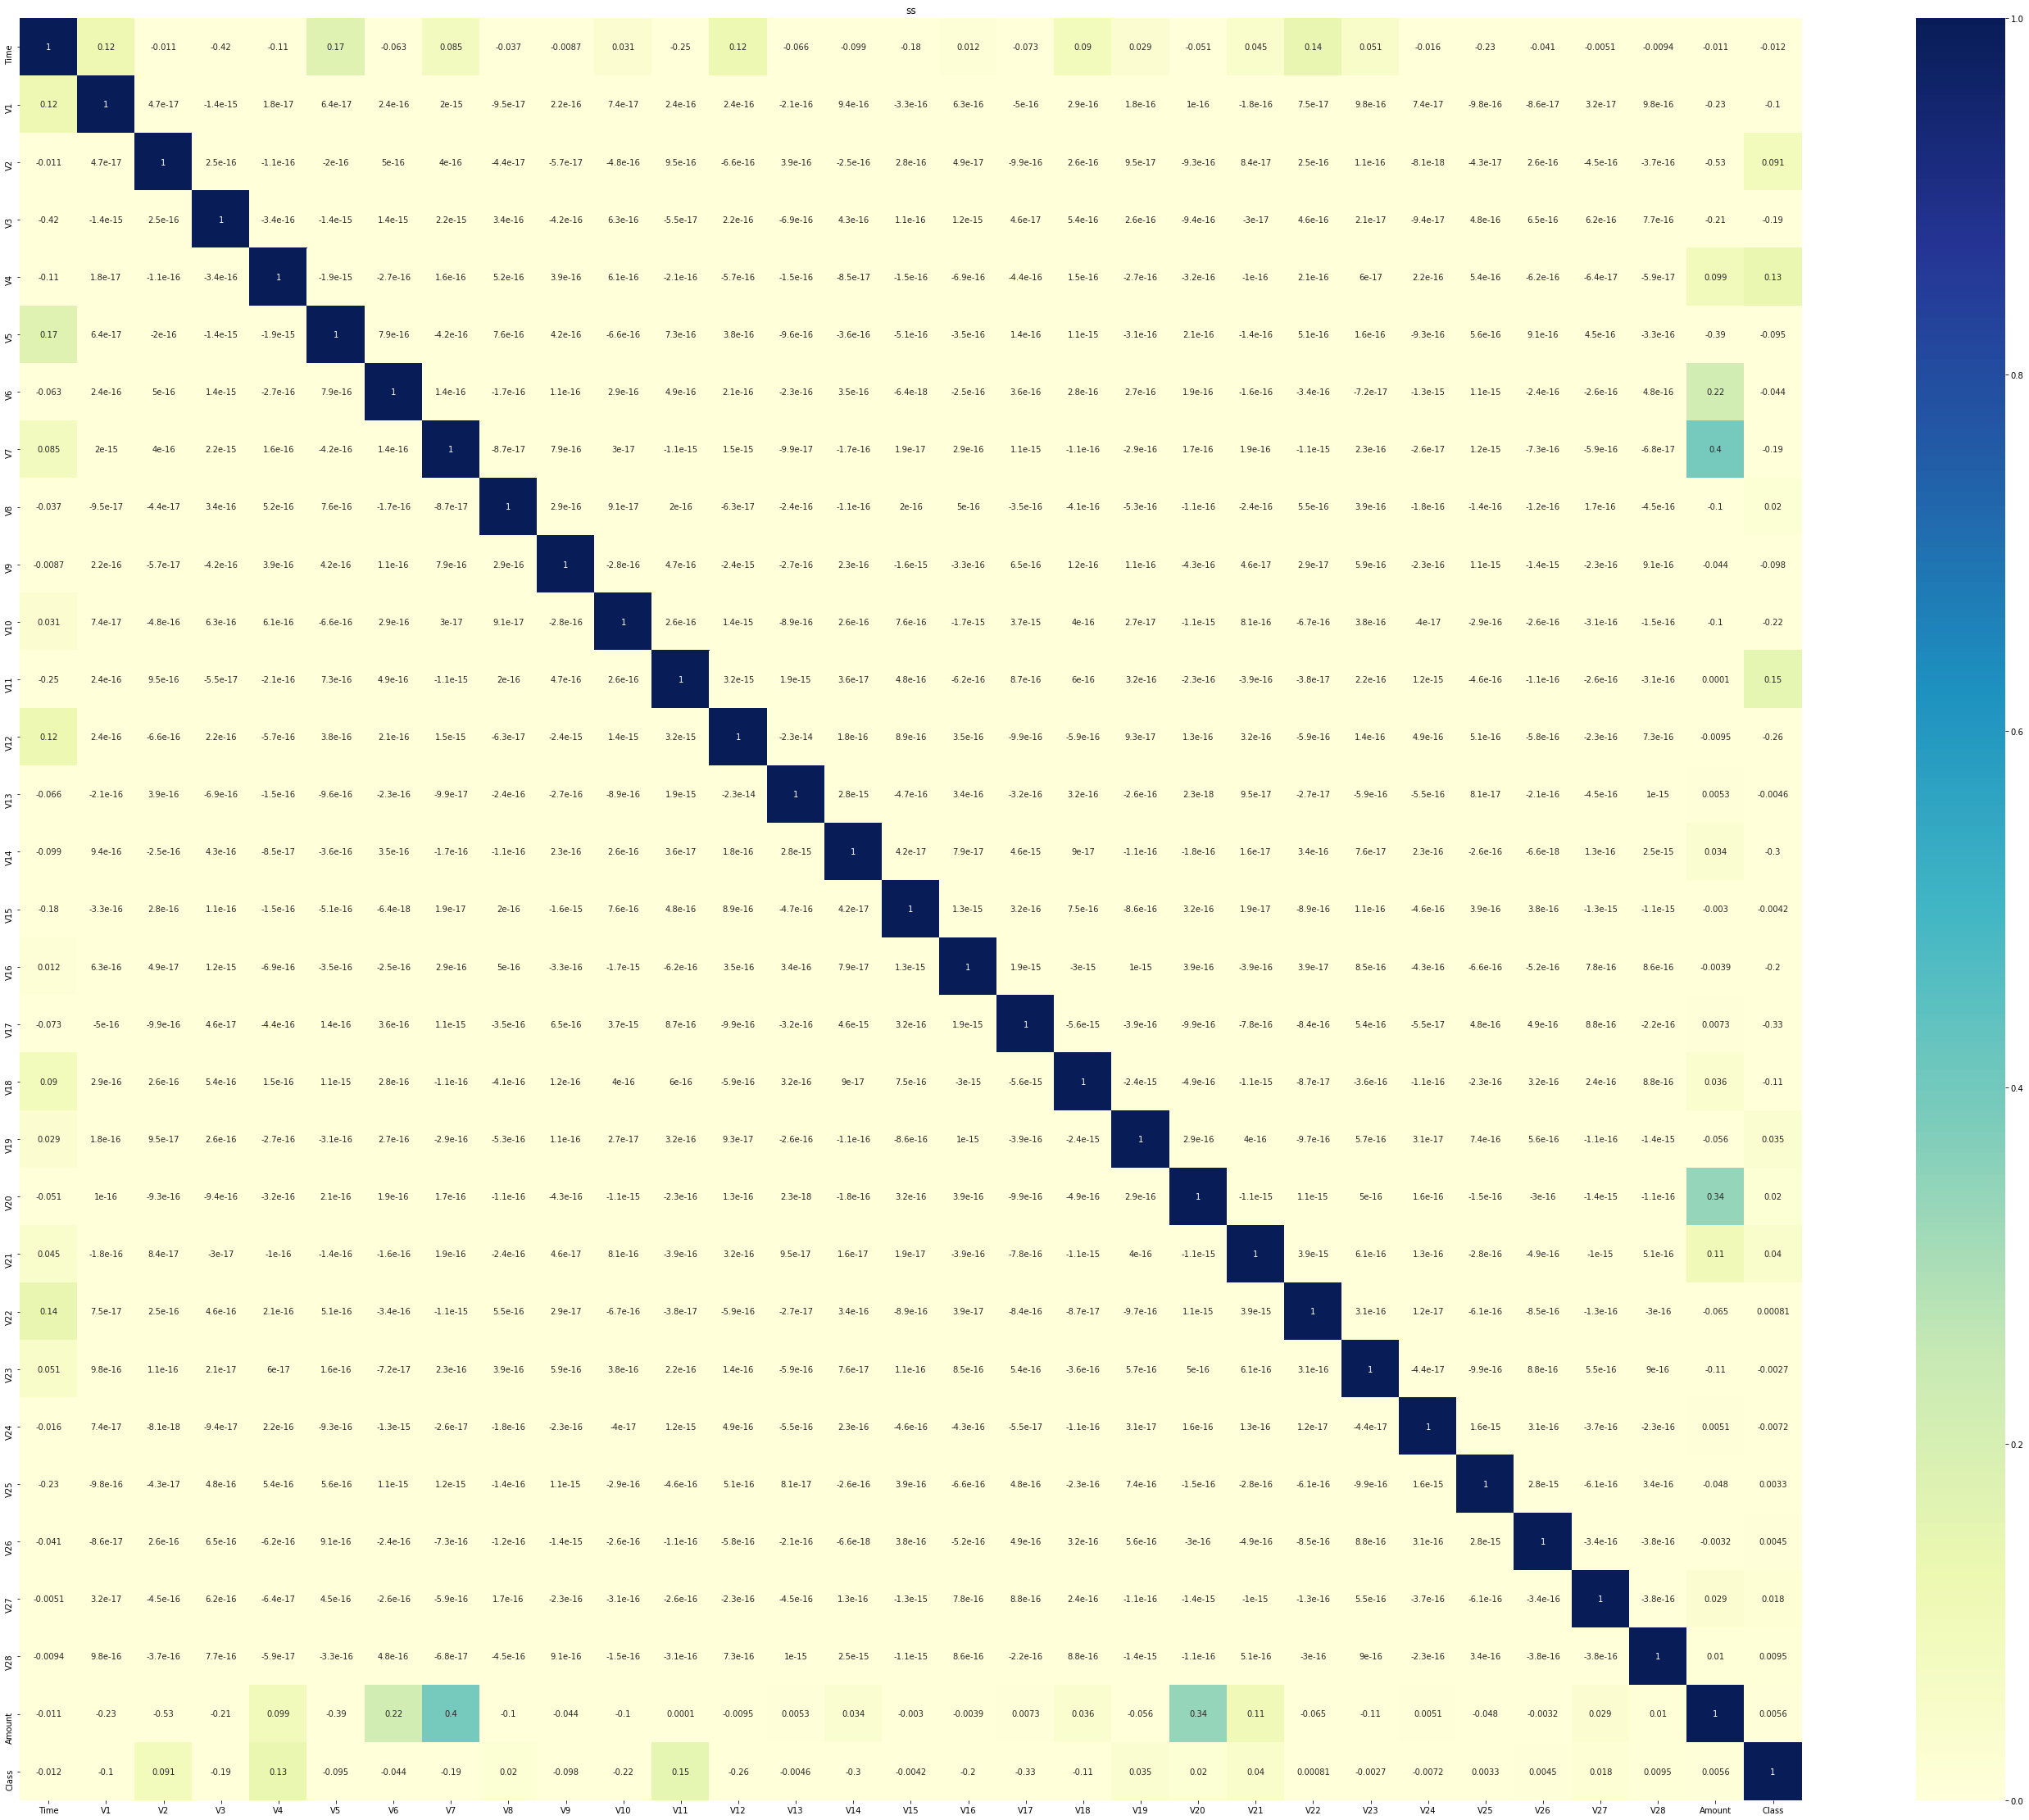

In [7]:
# 查看特征值直接的相关性
corr = data.corr()
plt.figure(figsize=(50,40))
sns.heatmap(corr,annot=True, vmax=1, vmin=0, xticklabels=True, yticklabels=True, square=True, cmap="YlGnBu")
plt.title("ss")
plt.show()

In [8]:
# 查看Class类别分布,可以发现类别极度不平衡

data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
# 因为需要使用LR回归跑模型，所以我们需要剔除一些列，并把所有特征列进行标准化

from sklearn.preprocessing import StandardScaler
data["Amount"] = StandardScaler().fit_transform(np.array(data["Amount"]).reshape(-1, 1)) # (-1, 1)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


####  调整类别不平衡的做法：上采样和下采样
####  下采样

In [10]:
undersample_seed = 0
num_Card_Fraud = data[data["Class"] == 1].shape[0]
num_Card_Fraud

492

In [11]:
Normal_users = data[data["Class"]==0].index.values
Normal_users_selection = np.random.RandomState(undersample_seed).choice(
    Normal_users, size=num_Card_Fraud, replace=False
)
len(Normal_users_selection)

492

In [12]:
# 合并
Card_Fraud = data[data["Class"]==1].index.values
selected_users = list(set(Normal_users_selection).union(set(Card_Fraud)))

In [13]:
new_train = data.loc[selected_users].copy()
new_train["Class"].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [14]:
new_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
251904,155554.0,-1.040067,3.106703,-5.409027,3.109903,-0.887237,-2.497522,-2.073347,0.639818,-3.013331,-5.954838,3.586395,-5.517148,0.683652,-8.560423,1.856095,-4.878248,-4.335998,-1.377191,3.057382,1.054390,0.773961,0.214868,-0.184233,-0.284091,0.493467,0.732329,0.675067,0.337076,0.025869,1
79873,58217.0,0.943324,-0.864723,0.921603,-0.678741,-1.274150,-0.023356,-0.710645,0.285016,1.793062,-1.033770,1.407788,1.289164,-0.943312,0.123709,0.469284,-0.731392,0.151229,0.170107,0.520140,-0.005275,0.092271,0.314828,-0.078717,0.226147,0.336239,-0.689416,0.088144,0.038838,0.049578,0
14338,25426.0,1.125336,1.130146,-0.962975,2.675688,0.990075,-0.243318,0.316192,0.122960,-1.143343,-0.369909,1.834494,-0.491243,-1.129907,-2.238622,0.278469,1.477926,1.776454,1.149282,-1.306995,-0.138814,-0.166737,-0.521934,-0.112376,-0.592077,0.520791,0.043354,0.015159,0.063612,-0.338197,1
79874,58217.0,-0.443794,1.271395,1.206178,0.790371,0.418935,-0.848376,0.917691,-0.235511,-0.285692,-0.867900,0.614977,-0.657948,-0.948412,-1.635145,1.263203,0.068533,1.325794,0.376383,-1.096196,-0.067205,0.119279,0.513479,-0.264243,0.443311,0.029516,-0.335141,-0.188815,-0.123391,-0.332879,1
120837,75978.0,-5.140723,3.568751,-5.896245,4.164720,-4.091193,-1.989960,-5.472436,2.422821,-2.909735,-6.287803,3.704312,-7.267550,0.329270,-8.458975,1.354487,-5.976221,-10.576015,-3.525161,1.737976,0.318995,1.131130,0.118022,-0.332704,0.139941,0.324758,-0.180769,0.177810,0.661555,0.046179,1


In [15]:
# 因为需要使用LR回归跑模型，所以我们需要剔除一些列，并把所有特征列进行标准化

from sklearn.preprocessing import StandardScaler
new_train["Amount"] = StandardScaler().fit_transform(np.array(new_train["Amount"]).reshape(-1,1))
feats = [i for i in new_train.columns if i not in ["Time", "Class"]]
train = new_train[feats]
label = new_train["Class"]

In [16]:
label.dtypes

dtype('int64')

In [17]:
label = label.astype(int)

In [18]:
label.head()

251904    1
79873     0
14338     1
79874     1
120837    1
Name: Class, dtype: int32

In [19]:
label.value_counts()

1    492
0    492
Name: Class, dtype: int64

#### 逻辑回归参数详解：
C：浮点型，默认：1.0；其值等于正则化强度的倒数，为正的浮点数。数值越小表示正则化越强。获得最好的C

In [20]:
# GridSearchCV
# https://www.cnblogs.com/wj-1314/p/10422159.html
# https://blog.csdn.net/weixin_41988628/article/details/83098130

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lg = LogisticRegression()
clf = GridSearchCV(lg, param_grid=[{"C":np.arange(0.001, 0.05, 0.001)}], cv = 5)
clf.fit(train, label)
best_model = clf.best_estimator_
clf.best_params_

{'C': 0.034}

#### 未采用下采样 和 采用下采样 的混淆矩阵对比

In [21]:
from sklearn.model_selection import train_test_split
# 切分训练集和测试集
train_x, test_x, train_y, test_y = train_test_split(data[feats], data["Class"], test_size=0.3, random_state=42)
print("train_x:", len(train_x))
print("test_x:", len(test_x))
print("data:", len(data))
# 切分下采样训练集和下采样测试集
train_x_us, test_x_us, train_y_us, test_y_us = train_test_split(new_train[feats], new_train["Class"], test_size=0.3, random_state=42)
print("- - - - - - - 分割线 - - - - - - - - ")
print("undersample_len_of_train_us:", len(train_x_us))
print("undersample_len_of_test_us:", len(test_x_us))
print("undersample_len_of_newtrain:", len(new_train))

train_x: 199364
test_x: 85443
data: 284807
- - - - - - - 分割线 - - - - - - - - 
undersample_len_of_train_us: 688
undersample_len_of_test_us: 296
undersample_len_of_newtrain: 984


In [22]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, recall_score, classification_report

In [23]:
import matplotlib.pyplot as plt

def plt_confusion(cm ,classes, title="Confusion matrix", cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    set_of_class = np.arange(len(classes))
    plt.xticks(set_of_class, classes, rotation=0)
    plt.yticks(set_of_class, classes)
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted label")

In [24]:
# 采用下采样的数据集

下采样逻辑回归数据召回率Recall： 0.9230769230769231


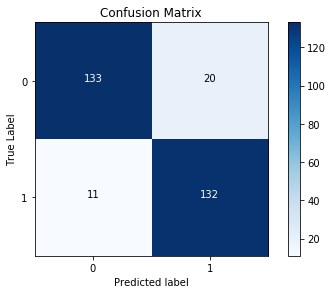

In [25]:
# 报错：https://blog.csdn.net/qq_22592457/article/details/103504796

import itertools

model = LogisticRegression(C = 0.01, penalty="l1", dual=False, solver='liblinear')
model.fit(train_x_us, train_y_us)
pred_y_us = model.predict(test_x_us)

# 计算混淆矩阵
confusion_matrix_ = confusion_matrix(test_y_us, pred_y_us)
np.set_printoptions(precision=2)

print("下采样逻辑回归数据召回率Recall：",confusion_matrix_[1,1] / (confusion_matrix_[1,0] + confusion_matrix_[1,1]))
classes = [0,1]
plt.figure()
plt_confusion(confusion_matrix_, classes=classes, title="Confusion Matrix")
plt.show()

In [26]:
# 使用类别不平衡且未下采样的数据集

源数据集召回率Recall： 0.5588235294117647


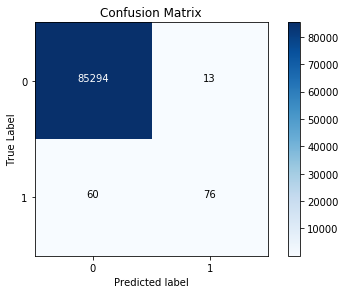

In [27]:
import itertools

model = LogisticRegression(C = 0.01, penalty="l1", dual=False, solver='liblinear')
model.fit(train_x, train_y)
pred_y = model.predict(test_x)

# 计算混淆矩阵
confusion_matrix_ = confusion_matrix(test_y, pred_y)
np.set_printoptions(precision=2)

print("源数据集召回率Recall：",confusion_matrix_[1,1] / (confusion_matrix_[1,0] + confusion_matrix_[1,1]))
classes = [0,1]
plt.figure()
plt_confusion(confusion_matrix_, classes=classes, title="Confusion Matrix")
plt.show()

In [28]:
# 采用下采样数据集进行SVM

下采样SVM数据召回率Recall： 0.9090909090909091


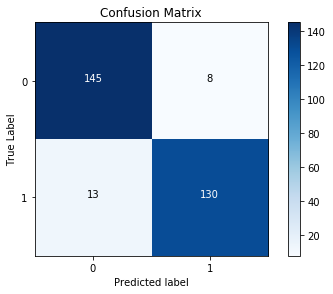

In [28]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
import itertools

model = SVC(kernel="linear")
model.fit(train_x_us, train_y_us)
pred_y_us = model.predict(test_x_us)

# 计算混淆矩阵
confusion_matrix_ = confusion_matrix(test_y_us, pred_y_us)
np.set_printoptions(precision=2)

print("下采样SVM数据召回率Recall：",confusion_matrix_[1,1] / (confusion_matrix_[1,0] + confusion_matrix_[1,1]))
classes = [0,1]
plt.figure()
plt_confusion(confusion_matrix_, classes=classes, title="Confusion Matrix")
plt.show()

In [30]:
# 采用源数据集进行SVM

In [ ]:
import itertools

model = SVC(kernel="linear")
model.fit(train_x, train_y)
pred_y = model.predict(test_x)

# 计算混淆矩阵
confusion_matrix_ = confusion_matrix(test_y, pred_y)
np.set_printoptions(precision=2)

print("源数据集SVM召回率Recall：",confusion_matrix_[1,1] / (confusion_matrix_[1,0] + confusion_matrix_[1,1]))
classes = [0,1]
plt.figure()
plt_confusion(confusion_matrix_, classes=classes, title="Confusion Matrix")
plt.show()